## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

## Kelompok 4
1. Ghibran Muhammad/08/1941720115
2. Revangga Adytya/26/2041720192
3. Yusril Izha M/30/

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
#CASE FOLDING :Pengubahan Huruf besar ke huruf kecil 
# Buat kolom tambahan untuk data description yang telah dicasefolding 
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

In [4]:
#CASE FOLDING : penghapusan karakter 
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

In [5]:
#CASE FOLDING : Penghapusan Spasi yang berlebihan 
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

In [6]:
#UBAH NAMA KOLOM SENTIMENT
df['hasil_tweet'] = df['content'].apply(clean_lower).apply(clean_punct).apply(_normalize_whitespace)
new_cols = {
    'tweet_id' : 'id',
    'sentiment' : 'Labels',

}

#rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)
df.head()

,id,Labels,content,hasil_tweet
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,tiffanylue i know i was listenin to bad habit ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin on y...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...


In [7]:
#Pengubahan Kode Labels dari Data Kategorial ke Data Numerik
encode = LabelEncoder()
df['Labels'] = encode.fit_transform(df['Labels'])
df.head()

,id,Labels,content,hasil_tweet
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...,tiffanylue i know i was listenin to bad habit ...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin on y...
2,1956967696,10,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,1956967789,3,wants to hang out with friends SOON!,wants to hang out with friends soon
4,1956968416,8,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...


In [8]:
#MEMISAHKAN FITUR DENGAN LABEL
X = df['hasil_tweet'].values
y = df['Labels'].values

In [10]:
#EKSTRASI FITUR
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
bow = CountVectorizer(stop_words='english')
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)


In [11]:
from sklearn import svm
from sklearn.metrics import classification_report

classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        30
           2       0.05      0.01      0.02       174
           3       0.01      0.01      0.01       153
           4       0.10      0.08      0.09       347
           5       0.30      0.34      0.32      1019
           6       0.27      0.22      0.24       259
           7       0.39      0.37      0.38       732
           8       0.35      0.53      0.42      1774
           9       0.11      0.06      0.08       306
          10       0.28      0.25      0.27       995
          11       0.10      0.04      0.05       468
          12       0.35      0.33      0.34      1726

    accuracy                           0.31      8000
   macro avg       0.18      0.17      0.17      8000
weighted avg       0.29      0.31      0.29      8000



Text(69.0, 0.5, 'Truth')

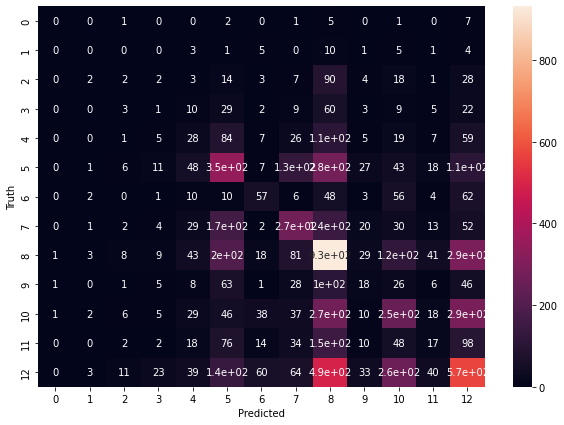

In [12]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_test, y_predict)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')